# Module 2: Gathering & Parsing Data

## Part 1: Data Formats

### How is data represented on a computer?

Let's review how data is stored on computers.

Let's start with a single byte (eight bits): `0110 0001` 

Converted to decimal, this is the number `97`.  But we can also use it to represent the letter 'A', why?

In [27]:
for x in range(32, 53):
    print(f"{x:<3} {chr(x):<3}      {x+20:<3} {chr(x+20):<3}      {x+40:<3} {chr(x+40):<3}      {x+60:<3} {chr(x+60):<3}      {x+80:<3} {chr(x+80):<3}")

32           52  4        72  H        92  \        112 p  
33  !        53  5        73  I        93  ]        113 q  
34  "        54  6        74  J        94  ^        114 r  
35  #        55  7        75  K        95  _        115 s  
36  $        56  8        76  L        96  `        116 t  
37  %        57  9        77  M        97  a        117 u  
38  &        58  :        78  N        98  b        118 v  
39  '        59  ;        79  O        99  c        119 w  
40  (        60  <        80  P        100 d        120 x  
41  )        61  =        81  Q        101 e        121 y  
42  *        62  >        82  R        102 f        122 z  
43  +        63  ?        83  S        103 g        123 {  
44  ,        64  @        84  T        104 h        124 |  
45  -        65  A        85  U        105 i        125 }  
46  .        66  B        86  V        106 j        126 ~  
47  /        67  C        87  W        107 k        127   
48  0        68  D        88  X        1

This is an "encoding", a mapping of how we'll interpret a single byte as a character.

When we talk about different data types, we're talking about encodings.

Let's consider a run of 4 bytes (32 bits) `0110 0001 0110 0001 0110 0001 0110 0001`: 

As an integer, this is the number `1,633,771,873`.

Interpreted as a float it is `259845894142441816064`.

Interpreted as 4 separate bytes, it is `97 97 97 97`, perhaps representing a greyscale pixel in an image (R=97, G=97, B=97, A=97) or as a string of length 4: `AAAA`. 

Ultimately, we need more information, we need to know how the data is meant to be intepreted.

Relatedly, when we talk about data, we'll need to know the file format.

Common File Formats:

* PDF, DOC, XLS - Documents
* JPG, PNG, BMP - Images
* ZIP, RAR, TAR, GZ - Archives
* MP3, AAC - Audio
* MP4, MOV, WebM - Video

**What about .py, .txt, .md?**

These are all text formats, the encoding is one of the common text encodings (UTF-8, ASCII, Windows-1252), which is why we can edit them all with the same editor.

### Binary File Formats

Let's say we're trying to represent data being sent over the network from a real-time location service:

- Car ID
- Latitude
- Longitude
- Altitude (meters)
- Heading (degrees)
- Velocity (meters/second)
- Status code (0 = inactive, 1 = active)

In [1]:
# Note: We will not use the `struct` module again in class
#       this is just to illustrate binary formats.
import struct
data = [737894404660, 44.21191, -87.58329, 14.9, 27.5, 16, 1]

# unsigned 64-bit, 5 floats, boolean
as_bytes = struct.pack("Qfffff?", *data)

print("As Bytes:", as_bytes)

# open file in writable-binary mode (wb)
with open("file.data", "wb") as f:
    f.write(as_bytes)
print()
print(f"wrote {len(as_bytes)} bytes to file")

# convert byte representation to binary (ascii) for display
print()
print("Binary:", ''.join([f'{b:#010b}'[2:] for b in as_bytes]))

# read from binary file
with open("file.data", "rb") as f:
    back_to_data = struct.unpack("Qfffff?", f.read())
    print()
    print(back_to_data)

As Bytes: b'4\x12\xef\xcd\xab\x00\x00\x00\xff\xd80B\xa5*\xaf\xc2ffnA\x00\x00\xdcA\x00\x00\x80A\x01'

wrote 29 bytes to file

Binary: 0011010000010010111011111100110110101011000000000000000000000000111111111101100000110000010000101010010100101010101011111100001001100110011001100110111001000001000000000000000011011100010000010000000000000000100000000100000100000001

(737894404660, 44.211910247802734, -87.58329010009766, 14.899999618530273, 27.5, 16.0, True)


### Text-Based File Formats

What if instead we wrote this to the file:

```
id=737894404660
latitude=44.21191
longitude=-87.58329
altitude=14.9
heading=27.5
velocity=16
status=1
```

In [6]:
# It is at least 101 bytes:

len("""id=737894404660
latitude=44.21191
longitude=-87.58329
altitude=14.9
heading=27.5
velocity=16
status=1""")

101

Of course, there's also the complexity of our custom code to parse this, whereas reading bytes in order is fairly straightforward and can be accomplished using Python's built in functions or the `struct` module as we've seen.

### Text-Based vs. Binary File Formats:

- Binary file formats are typically much more efficient storage-wise, especially as data grows.
- Binary file formats typically need to embed version information, since if fields change, parser will need to know.
- Text-based formats allow usage of any editor, can be edited by users easily (which may be good or bad).
- Text-based formats are typically more flexible by design. (Depends on encoding & format.)

### CSV

Comma-Separated Values

(Does not need to be commas, you'll commonly see pipes `|` or tabs `\t` as well, and sometimes unusual characters, why?)

```
id,lat,lng,altitude,heading,velocity,active
737894404660,44.211910247802734,-87.58329010009766,14.899999618530273,27.5,16.0,true
```

**What limitations does this suggest?**

### XML

```xml
<location_update car_id="737894404660" active="true">
    <coordinates lat=44.21191 lng=-87.58239></coordinates>
    <altitude unit="m">14.9</altitude>
    <movement>
        <heading>27.5</heading>
        <velocity>16</velocity>
    </movement>
</location_update>
```

**Must be well-formed & can be validated against a fixed schema.**

### JSON

```json
{"id": 737894404660, "coordinates": [44.21191, -87.58239], "altitude": 14.9, "movement": {"heading": 27.5, "velocity": 16}, "active": True}
```

**Must be well-formed, schema tools exist but not as widely adopted.**

### HTML

```html

<div class="active">
    <h2>Car ID: 737894404660</h2>
    <dl>
        <dt>Latitude</dt>
        <dd>44.21191</dd>
        <dt>Longitude</dt>
        <dd>-87.58239</dd>
        <dt>Altitude</dt>
        <dd>14.9</dd>
    </dl>
    <span id="movement">Moving at 16 m/s, heading 27.5°</span>
</div>
```

### Final Thoughts

- No matter the format, you need to know what the data represents & how it'll be formatted.
- You typically don't get to pick what data format you get, so it'll be important to find tools to handle any format you encounter.
- In general, the more human-readable the format is, the more expensive it is to parse.
- Which of these would you prefer given the choice?

## Part 2: Data From The Web

### HTTP

Up until now, we've assumed the data is already on disk (`open(filename)`), but we'll need to see how to get the data itself.

To do this, we'll need to make HTTP requests.  Every time you load a web page, click a link, submit a form, etc. your browser makes an HTTP request.  (Often more than one!)

An HTTP request consists of several parts:

* **Verb**: GET, POST, HEAD, PUT, DELETE, PATCH, etc.
* **URI**: Everything after the domain name (e.g. "/profiles/james-turk/")
* **Request Headers**: String Key-value pairs, one per line
    * User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:102.0) Gecko/20100101 Firefox/102.0
    * Accept-Language: de
    * Cookie: name=value; name2=value2; name3=value3
* **Body**: Where POST data lives (e.g. form submission)

This is sent to a server, which replies with an HTTP Response:

* **Status**: 200, 404, 500
* **Response Headers**: key-value pairs similar to request headers
    * Content-Type: text/html
    * Content-Language: de-DE
* **Body**: Actual content (e.g. HTML), but can be anything (images, audio, JSON, etc.)


### Making Requests

Python has a built in library `urllib.request` that allows you to make HTTP requests.  

https://docs.python.org/3/library/urllib.request.html

It isn't the easiest to use, which is why the third party library `requests` is what we'll use.

http://requests.readthedocs.io/

The de-facto standard for HTTP(s) requests since ~2012.

Others to consider: 

`urllib3` - Offers more control over requests including timeouts, etc.

`httpx` - Allows for asynchronous requests (beyond the scope of this course).

`scrapelib` - Wrapper around `requests` that adds some features like retries and scraper-oriented caching.

#### `requests` quick start

**Common Methods**

`requests.get`, `requests.post`, `requests.request`

All take:

* `url`: URL to fetch (required)
* `params`: Optional dictionary of URL parameters.
* `headers`: Optional dictionary of request headers.
* `data`: Optional request body (POST).

And return a `Response` object with the following attributes:

* `r.status_code` - numeric status code (200, 404, 500, etc.)
* `r.headers` - response headers in a `dict`
* `r.content` - raw bytes of response (for binary formats)
* `r.text` - text of response (for HTML, etc.)
* `r.json()` - helper method to return parsed JSON if response was JSON

#### Example: Basic HTTP Request

In [66]:
import requests

response = requests.get("https://example.com")
print(response.status_code)
print(response.text)

200
<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This d

### HTML in Practice

An HTML page is comprised of tags which can each contain data of their own (attributes), most tags can also contain tags within them.  For example, here's a simple HTML table:

```html
<table>
<thead>
    <tr> <th>Name</th> <th>Phone</th> </tr>
</thead>
<tbody>
    <tr> <td> Katie </td> <td> 123-456-7890 </td> </tr> 
    <tr> <td> Kevin </td> <td> 555-123-0000 </td> </tr>
    <tr> <td> Hazel </td> <td> 777-999-5555 </td> </tr>
</tbody>
</table>
```

(This would presumably be within a larger page.)

It renders like this:

<table>
<thead>
    <tr> <th>Name</th> <th>Phone</th> </tr>
</thead>
<tbody>
    <tr> <td> Katie </td> <td> 123-456-7890 </td> </tr> 
    <tr> <td> Kevin </td> <td> 555-123-0000 </td> </tr>
    <tr> <td> Hazel </td> <td> 777-999-5555 </td> </tr>
</tbody>
</table>

But this also renders to the same table:

```html
<table>
    <tr> <th>Name</th> <th>Phone</th>
    <tr> <td> Katie <td> 123-456-7890 
    <tr> <td> Kevin <td> 555-123-0000 </td>
    <tr> <td> Hazel <td> 777-999-5555
</table>
```


<table>
    <tr> <th>Name</th> <th>Phone</th>
    <tr> <td> Katie <td> 123-456-7890 
    <tr> <td> Kevin <td> 555-123-0000 </td>
    <tr> <td> Hazel <td> 777-999-5555
</table>

That's because HTML does not have to be well-formed, and often isn't.

Furthermore, there are many ways to express the same concepts in HTML, for example, the same data could be represented in completely different markup:

```html
<div class=”datatable”> 
  <h1>Name</h1>
  <h1>Phone</h1>
  <div class=”datarow”>
    <span id=”c11”>Katie</span>
    <span id=”c12”>123-456-7890</span>
  </div>
  <div class=”datarow”>
    <span id=”c21”>Kevin</span>
    <span id=”c22”>555-123-0000</span>
  </div>
</div>
```

### Working with HTML

**Parsing**: Need to be flexible in what we accept, there's a lot of malformed HTML out there.

**Content**: A jumbled mess of nested tags & attributes. 

- bad news: no agreed upon structure, focused on presentation
- good news: if things are visually distinct, we can probably scrape them

We want to parse the HTML to a structure we can navigate & search individual nodes for the data we need.

Example parse tree:

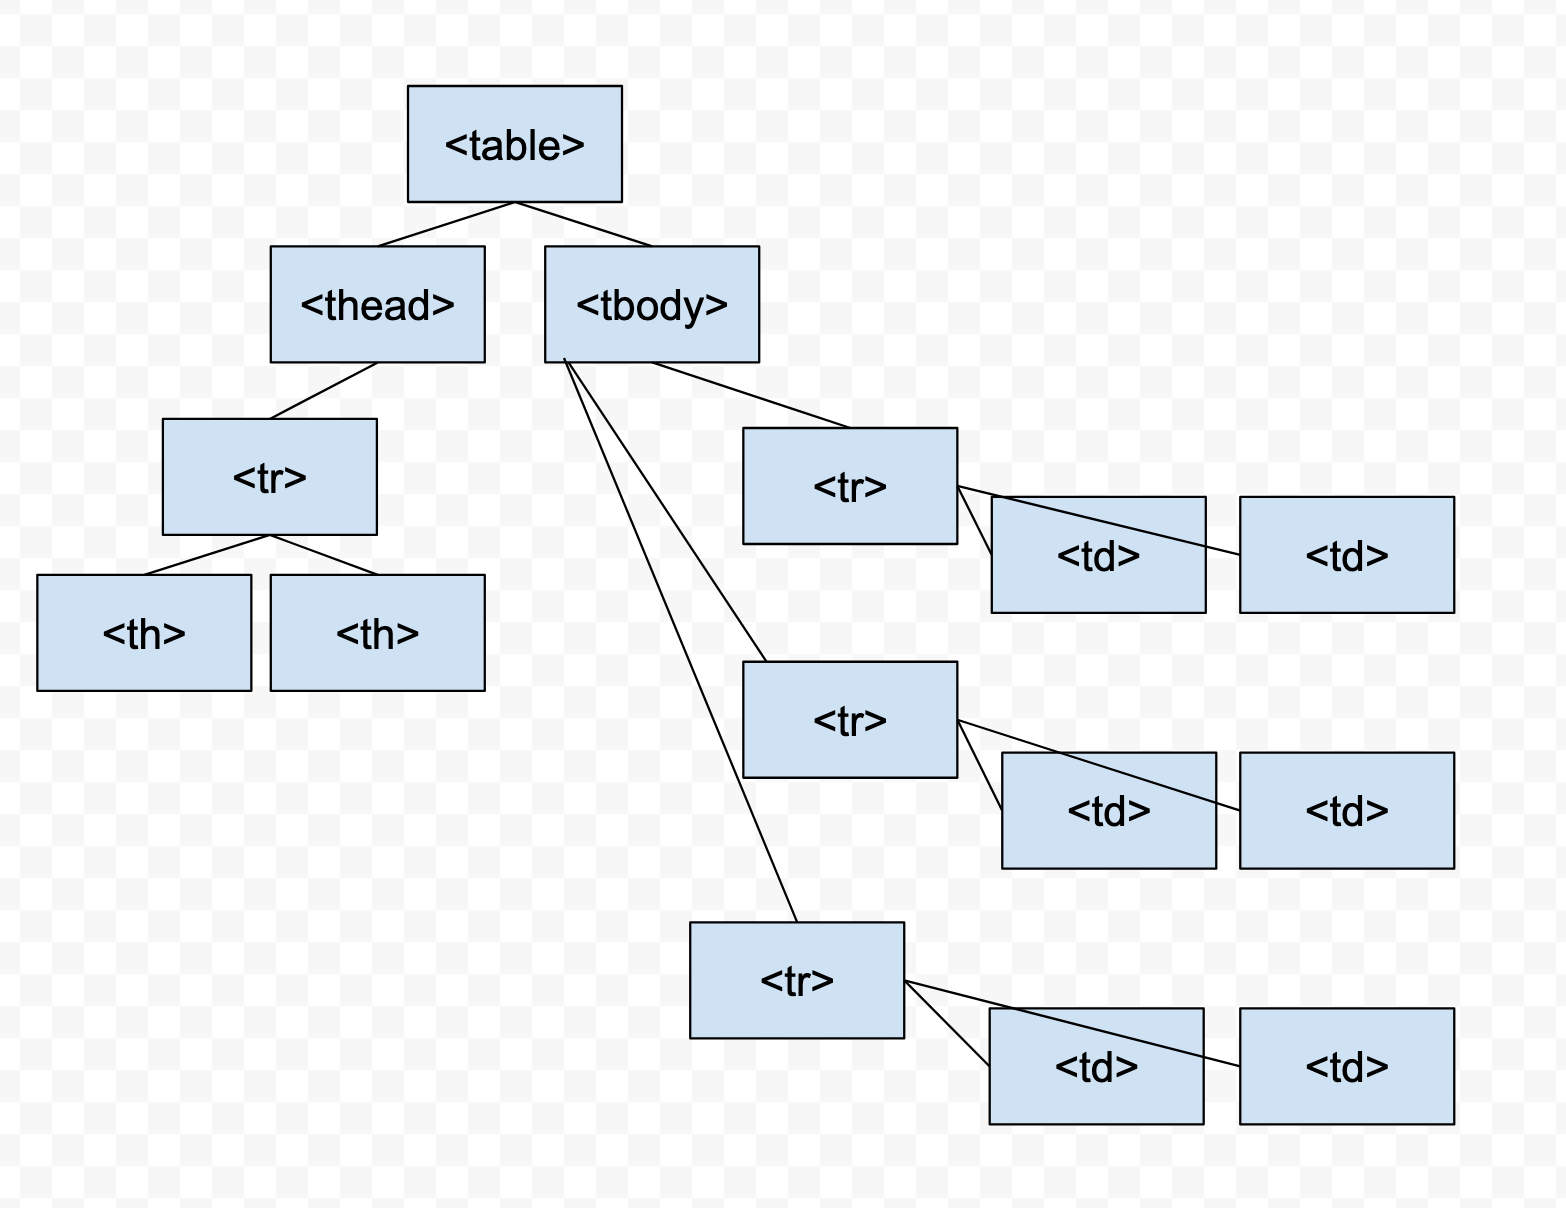

### HTML Parsing Libraries

`BeautifulSoup` 

The oldest, most features, and slowest.  Supports CSS selections & node traversal.

`lxml.html`

Python wrapper for C `libxml2`, very fast.  Supports XPath & CSS selection as well as node traversal.

`selectolax`

Newest library, gaining some popularity, uses a new C parser.  Supports CSS & node traversal.

#### Features
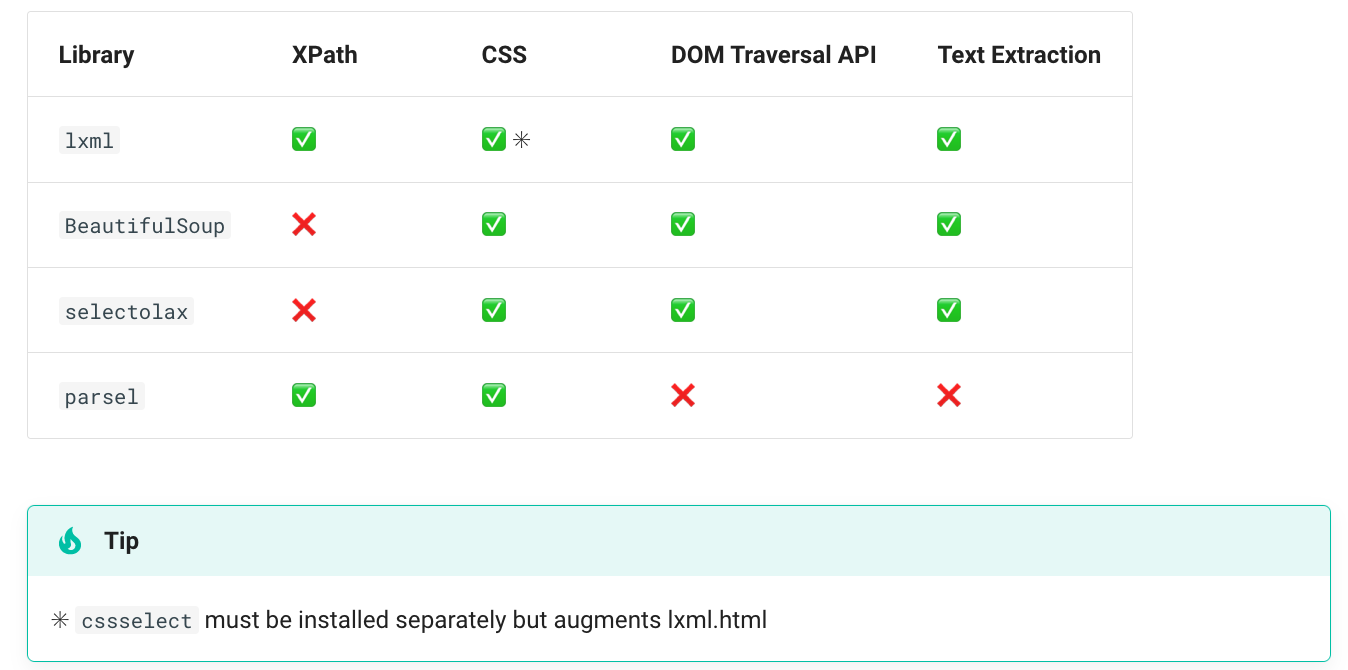

#### Complexity
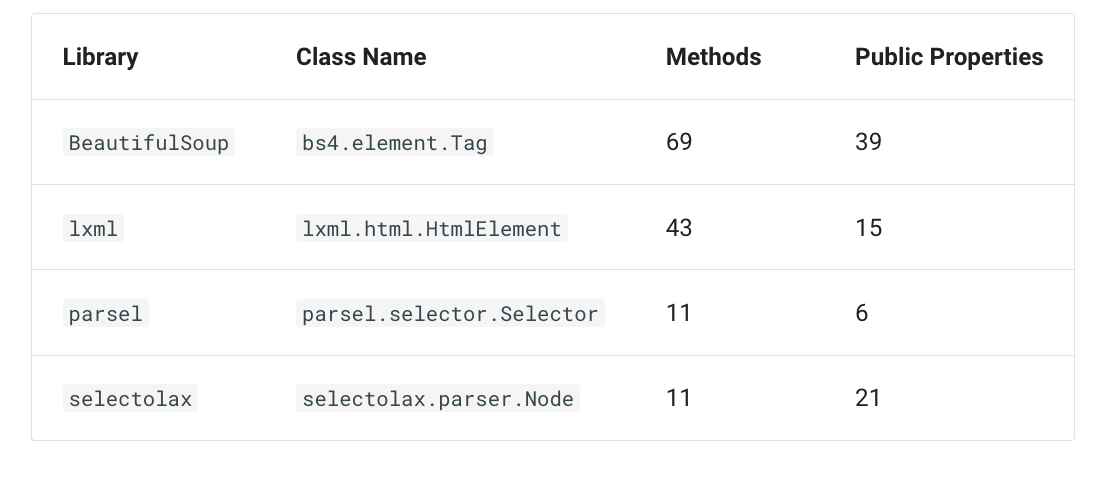

#### Parsing Speed
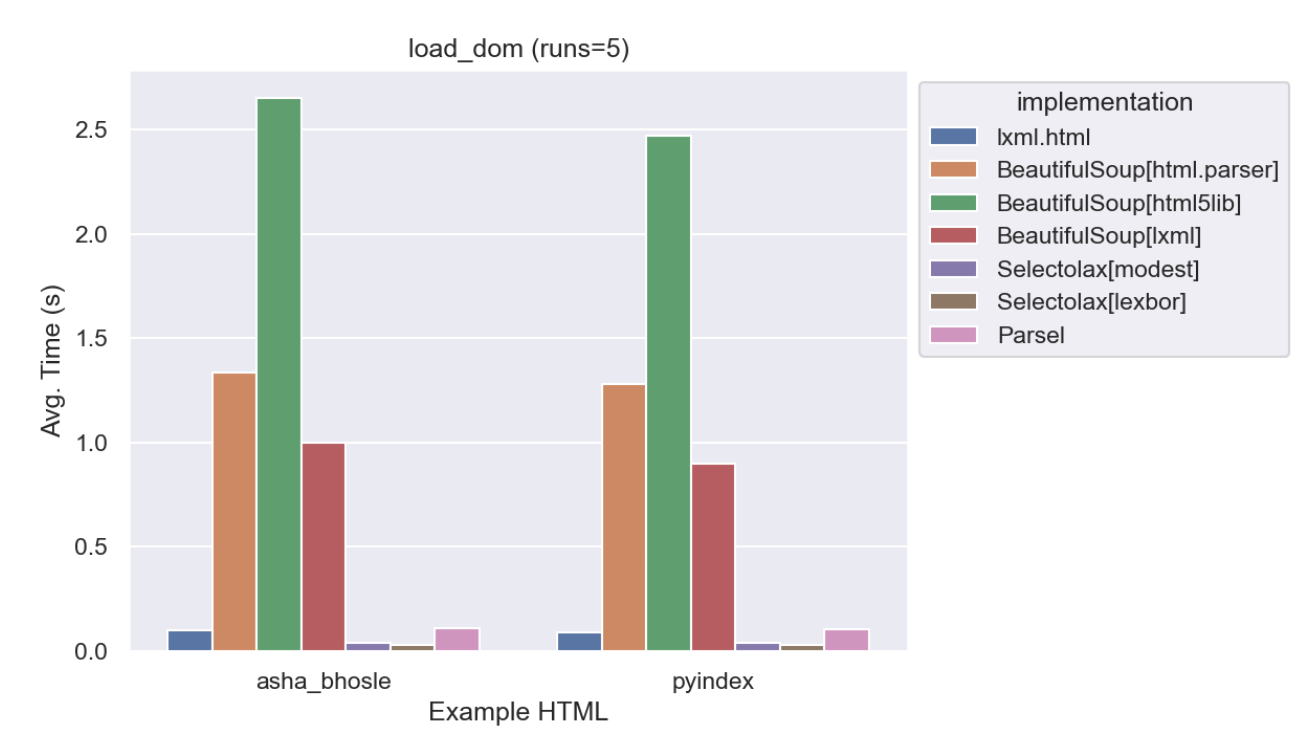


We'll be using `lxml.html` as it is stable & full-featured and comes without the overhead of `BeautifulSoup`.  It also encourages best practices like using either XPath or CSS Selectors as we'll see.

Ideas learned will generally apply to others though.



### `lxml.html` quickstart

The first thing you will always do with HTML is parse the document (string) to get your library's tree representation (`lxml.html.Element`, `BeautifulSoup`, etc.)

For `lxml.html` that means using `lxml.html.fromstring(html_text)` where `html_text` is a string with the actual HTML in it.
(You likely obtain this via `response.text` if you're using `requests`)

Once we have the root node of the parsed HTML, we can call methods to get related nodes.  Common methods:

| method | purpose |
|-|-|
| `elem = lxml.html.fromstring(html_text)` | Parse `html_text` to obtain a root node `elem` |
| `elem.getchildren()` | Get list of all immediate child elements. |
| `elem.parent` | Get direct parent of node. |
| `elem.text_content()` | Get all interior text (including subnodes). |
| `elem.get_element_by_id("some_id")` | Get element that matches ID | 
| `elem.cssselect("p.name")` | Use CSS selectors to obtain all `<p>` tags with class `name`. |
| `elem.xpath("//p[@class='name']")` | Use XPath selector to obtain same as above. |
| `elem.get("href")` | Get `href` attribute value from the node. |

### Scraping "Algorithm"

1) Inspect the page via view-source or your web inspector.
2) Find a CSS (or XPath) selector to select an element containing the data you want.  *It is best to get as close to the element in question as you can.*
3) Traverse the tree as necessary using other CSS/XPath expressions or node traversal if needed.
4) Repeat for other types of data that you need.  If pieces of data are related/similar, consider if adjusting your selectors will result in code that is easier to read/maintain.

### Scraping Example

Let's collect data from: https://www.senate.gov/senators/SenateSalariesSince1789.htm


Relevant HTML:

```html
<table width="100%" id="SortableData_table" cellspacing="0">
 <tfoot class="SortableData_table_header1">
     <tr><th style="border:0;" colspan="2"></th></tr>
 </tfoot>
 <thead class="SortableData_table_header2">
   <tr align="left">
      <th align="left" style="width:">Years</th><th align="left" style="width:">Salary</th>
   </tr>
 </thead>
 <tbody>
   <tr>
      <td><span style="display:none">1789_1815</span>1789&#150;1815</td><td>$6.00 per diem</td>
   </tr>
  ...
 </tbody>
</table>
```

In [77]:
import requests
import lxml.html

response = requests.get("https://www.senate.gov/senators/SenateSalariesSince1789.htm")
root = lxml.html.fromstring(response.text)

print(root)                
# <Element html at 0x105901300>


<Element html at 0x112f02ac0>


In [78]:
print(root.getchildren())
# [<!-- <![endif] -->, <Element head at 0x10b623790>, <Element body at 0x10b38fe20>]


[<!-- <![endif] -->, <Element head at 0x112ee1800>, <Element body at 0x112ee0b30>]


In [79]:
# Senate Example 2: Extracting information by position
table = root.get_element_by_id("SortableData_table")
print(table.getchildren())
# [<Element tfoot at 0x10f1fb600>, <Element thead at 0x10f1fb6a0>, <Element tbody at 0x10f1fb650>]

print(table.getchildren()[2].getchildren())
# [<Element tr at 0x10f1fb600>, <Element tr at 0x10f1fb6f0>, ...]


[<Element tfoot at 0x110870270>, <Element thead at 0x112f02c00>, <Element tbody at 0x112f02d90>]
[<Element tr at 0x110870270>, <Element tr at 0x112f02c00>, <Element tr at 0x1108803b0>, <Element tr at 0x112e2be20>, <Element tr at 0x112e2bf60>, <Element tr at 0x112e2bd30>, <Element tr at 0x112e2bc90>, <Element tr at 0x112e2bd80>, <Element tr at 0x112e2bce0>, <Element tr at 0x112e2bbf0>, <Element tr at 0x112e2bc40>, <Element tr at 0x112e2bb00>, <Element tr at 0x112e2ba10>, <Element tr at 0x112e2bba0>, <Element tr at 0x112e2b8d0>, <Element tr at 0x112e2b880>, <Element tr at 0x112e2b830>, <Element tr at 0x112e2b7e0>, <Element tr at 0x112e2b740>, <Element tr at 0x112e2b790>, <Element tr at 0x112e2b6f0>, <Element tr at 0x112e2b600>, <Element tr at 0x112e2b650>, <Element tr at 0x112e2b6a0>, <Element tr at 0x112e2b510>, <Element tr at 0x112e2b5b0>, <Element tr at 0x112e2b470>, <Element tr at 0x112e2b560>, <Element tr at 0x112e2b3d0>, <Element tr at 0x112e2b380>, <Element tr at 0x112e2b330>, <El

In [85]:
# Senate Example 3: Extracting information by CSS selector


rows = root.cssselect("#SortableData_table tbody tr")
for row in rows:
    year_td, salary_td = row.cssselect("td")
    year = year_td.text_content()
    salary = salary_td.text_content()
    print(year, "|", salary)

# ...
# 20222022 $174,000 per annum



1789_181517891815 | $6.00 per diem
1815_181718151817 | $1,500 per annum
1817_185518171855 | $8.00 per diem
1855_186518551865 | $3,000 per annum
1865_187118651871 | $5,000 per annum
1871_187318711873 | $7,500 per annum
1873_190718731907 | $5,000 per annum
1907_192519071925 | $7,500 per annum
1925_193219251932 | $10,000 per annum
1932_193319321933 | $9,000 per annum
1933_193519331935 | $8,500 per annum
1935_194719351947 | $10,000 per annum
1947_195519471955 | $12,500 per annum
1955_196519551965 | $22,500 per annum
1965_196919651969 | $30,000 per annum
1969_197519691975 | $42,500 per annum
1975_197719751977 | $44,600 per annum
1977_197819771978 | $57,500 per annum
1979_198319791983 | $60,662.50 per annum
19831983 | $69,800 per annum
19841984 | $72,600 per annum
1985_198619851986 | $75,100 per annum
19870101_19870203Jan 1, 1987  Feb 3, 1987 | $77,400 per annum
19870204Feb 4, 1987 | $89,500 per annum
19900201Feb 1, 1990 | $98,400 per annum
19911991 | $101,900 per annum


In [83]:
# Senate Example 4: Extraction via XPath


rows = root.xpath("//table[@id='SortableData_table']/tbody/tr")
for row in rows:
    year, salary = row.xpath(".//td/text()")
    print(year, "|", salary)

# ...
# 2022 $174,000 per annum


17891815 | $6.00 per diem
18151817 | $1,500 per annum
18171855 | $8.00 per diem
18551865 | $3,000 per annum
18651871 | $5,000 per annum
18711873 | $7,500 per annum
18731907 | $5,000 per annum
19071925 | $7,500 per annum
19251932 | $10,000 per annum
19321933 | $9,000 per annum
19331935 | $8,500 per annum
19351947 | $10,000 per annum
19471955 | $12,500 per annum
19551965 | $22,500 per annum
19651969 | $30,000 per annum
19691975 | $42,500 per annum
19751977 | $44,600 per annum
19771978 | $57,500 per annum
19791983 | $60,662.50 per annum
1983 | $69,800 per annum
1984 | $72,600 per annum
19851986 | $75,100 per annum
Jan 1, 1987  Feb 3, 1987 | $77,400 per annum
Feb 4, 1987 | $89,500 per annum
Feb 1, 1990 | $98,400 per annum
1991 | $101,900 per annum
Aug 15, 1991 | $125,100 per annum
1992 | $129,500 per annum
1993 | $133,600 per annum
1994 | $133,600 per annum
1995 | $133,600 per annum
1996 | $133,600 per annum
1997 | $133,600 per annum
1998 | $136,700 per annum
1999 | $1

## Part 3: APIs

As we've seen, HTML is not an ideal format for data.

APIs let us request data from applications running on the web in **machine readable** formats.

An API can return data in any format really, there are APIs that generate PDFs, images, HTML, etc, but typically we're talking about text-based formats like CSV, JSON, and XML.

While there are many styles of API, it is generally possible to think of APIs as *functions you call via HTTP*.  

### XML revisited

XML is made up of arbitrary tags that can be tailored to the data at hand.  Typically the set of valid tags & how they nest, etc. is provided in the form of an **XML Schema**.

One advantage of XML is that it is *strict*, you cannot omit tags, etc. and instead must match tags & follow the schema if one is provided.

```xml
<address-book>
    <entry name=”Katie”> <phone>555-123-1234</phone> </entry>
    <entry name=”Kevin”> <phone>123-456-7890</phone> </entry>
    <entry name=”Hazel”> <phone>675-900-5555</phone> </entry>
</address-book>
```

```python
# Note: lxml.etree.fromstring instead of lxml.html.fromstring
root = lxml.etree.fromstring(xml_response.text)
for entry in root.xpath(“//entry”):
	print(entry.get(“name”), entry.xpath(“./phone/text()”))
```

### JSON

In 2023, most APIs you find will support JSON.

JSON is JavaScript Object Notation, it is nearly identical to how JavaScript represents its `object` type.  This is also incredibly similar to Python's `dict`.

Python Type | JSON Type  | Notes
------------|------------|-----
string      | string     | "double quotes only"
int, float  | number     |
dict        | object     | In JSON all keys must be strings
list        | array      | 
bool        | bool       | JSON `true`, `false` are lower case.
`None`        | `null`   | Different name, same purpose.

JSON does not natively support other types.  If you have (e.g.) datetime data, you will need to convert it to types JSON can understand (e.g. "2023-01-01" as string).

We convert between types like `JSON` and `XML` and native Python data using **serialization** & **deserialization**.

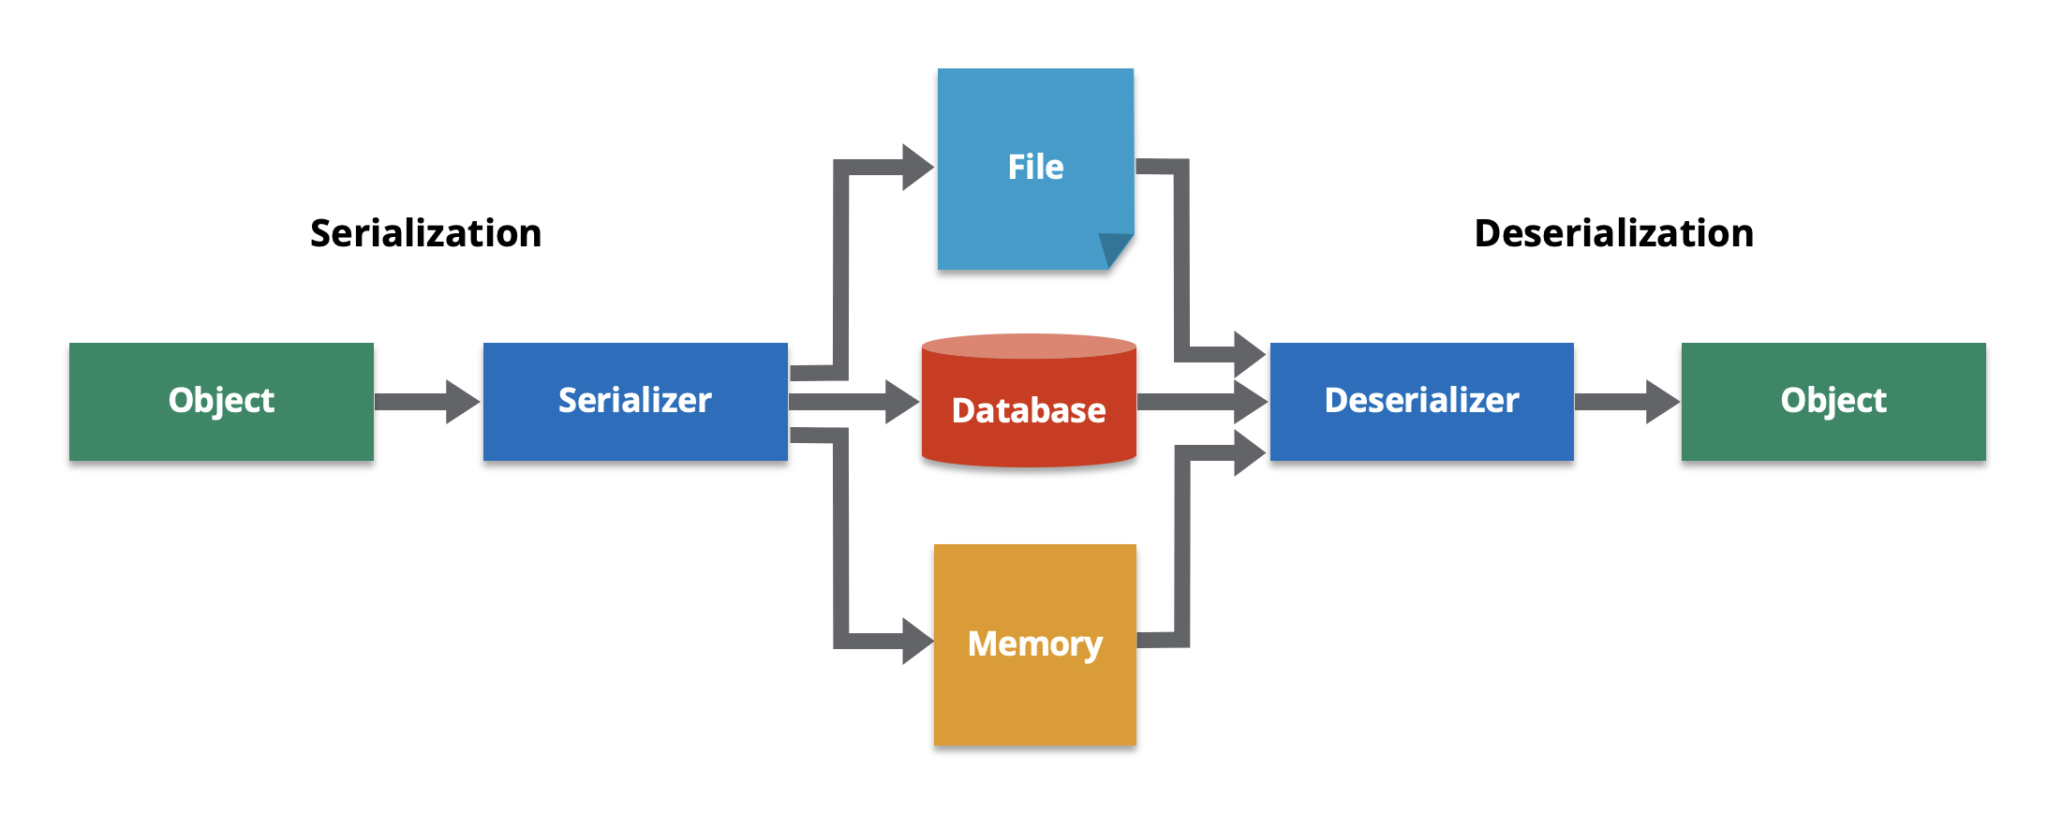


#### Serialization Example

`import json`

`json.dump` & `json.dumps` - serialize objects to JSON

In [8]:
import json

data = [
    {"id": 123, "coordinates": [44.21191, -87.58239], "altitude": 14.9, "movement": {"heading": 27.5, "velocity": 16}, "active": True},
    {"id": 555, "coordinates": [0, 0], "altitude": 100, "movement": {"heading": 90, "velocity": 100}, "active": True},
    {"id": 555, "coordinates": [35.88, 76.52], "altitude": 5000, "movement": {"heading": 0, "velocity": 0}, "active": False},
]

# dumps returns a string
json_str = json.dumps(data)
print(type(json_str))
print(json_str)

# can also write directly to file-type object
with open("output.json", "w") as f:
    json.dump(data, f, indent=1)  # using optional indent parameter to make JSON easier to read

<class 'str'>
[{"id": 123, "coordinates": [44.21191, -87.58239], "altitude": 14.9, "movement": {"heading": 27.5, "velocity": 16}, "active": true}, {"id": 555, "coordinates": [0, 0], "altitude": 100, "movement": {"heading": 90, "velocity": 100}, "active": true}, {"id": 555, "coordinates": [35.88, 76.52], "altitude": 5000, "movement": {"heading": 0, "velocity": 0}, "active": false}]


In [11]:
!cat output.json

[
 {
  "id": 123,
  "coordinates": [
   44.21191,
   -87.58239
  ],
  "altitude": 14.9,
  "movement": {
   "heading": 27.5,
   "velocity": 16
  },
  "active": true
 },
 {
  "id": 555,
  "coordinates": [
   0,
   0
  ],
  "altitude": 100,
  "movement": {
   "heading": 90,
   "velocity": 100
  },
  "active": true
 },
 {
  "id": 555,
  "coordinates": [
   35.88,
   76.52
  ],
  "altitude": 5000,
  "movement": {
   "heading": 0,
   "velocity": 0
  },
  "active": false
 }
]

#### Deserialization Example

`json.load` & `json.loads` - Deserialization

In [9]:
d = json.loads('{"name": "Hank", "id": 1138}')
print(type(d), d)

<class 'dict'> {'name': 'Hank', 'id': 1138}


In [17]:
with open("output.json") as f:
    data = json.load(f)

for item in data:
    print(item)

{'id': 123, 'coordinates': [44.21191, -87.58239], 'altitude': 14.9, 'movement': {'heading': 27.5, 'velocity': 16}, 'active': True}
{'id': 555, 'coordinates': [0, 0], 'altitude': 100, 'movement': {'heading': 90, 'velocity': 100}, 'active': True}
{'id': 555, 'coordinates': [35.88, 76.52], 'altitude': 5000, 'movement': {'heading': 0, 'velocity': 0}, 'active': False}


### URL Parameters Revisited

A URL is comprised of various pieces:

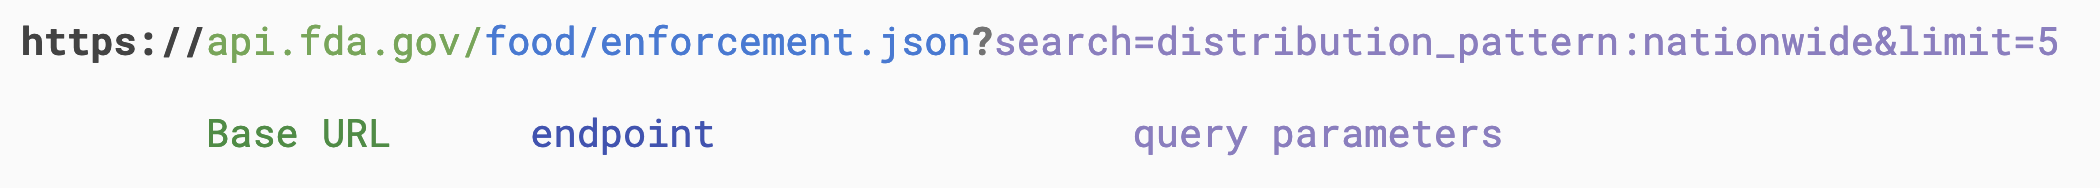

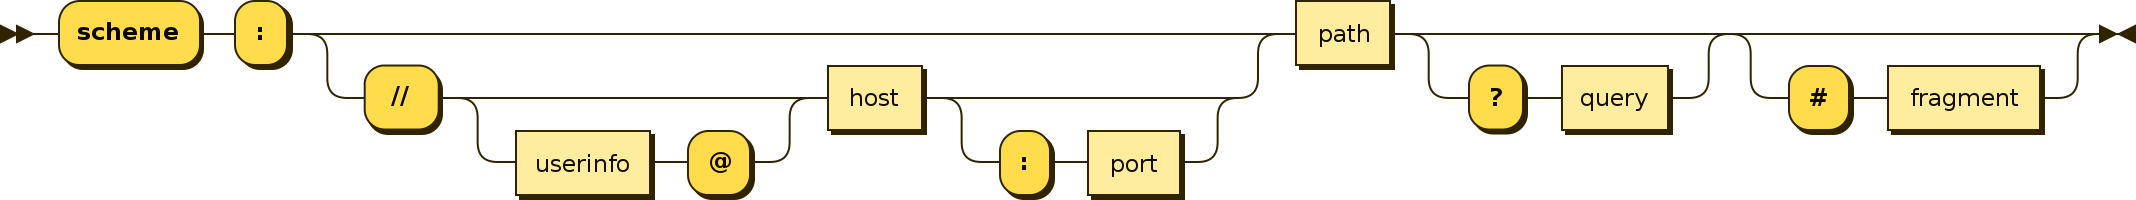


*URLs can include authentication information but this is very uncommon in modern practice as it can be insecure.*

**URL parameters** come after the URI, and are denoted by a `?` character.

After the `?` they appear as key-value pairs in the form `key=value`, with `&` connecting them.

**Note:** Not all characters are allowed in URLs. Special characters need to be escaped, you'll see things like `'%20'` in a URL representing an otherwise disallowed character (in this case, a space).

Fortunately, libraries can handle this for us!

### JSON API Example


In [47]:
# Take 1

import requests
import json
from pprint import pprint

# entire URL as a string
url = ("https://api.fda.gov/food/enforcement.json"
       "?search=distribution_pattern:nationwide&limit=2")
response = requests.get(url)

# load JSON manually
data = json.loads(response.text)

pprint(data)

{'meta': {'disclaimer': 'Do not rely on openFDA to make decisions regarding '
                        'medical care. While we make every effort to ensure '
                        'that data is accurate, you should assume all results '
                        'are unvalidated. We may limit or otherwise restrict '
                        'your access to the API in line with our Terms of '
                        'Service.',
          'last_updated': '2022-12-21',
          'license': 'https://open.fda.gov/license/',
          'results': {'limit': 2, 'skip': 0, 'total': 4940},
          'terms': 'https://open.fda.gov/terms/'},
 'results': [{'address_1': '2610 Homestead Pl',
              'address_2': '',
              'center_classification_date': '20200413',
              'city': 'Rancho Dominguez',
              'classification': 'Class III',
              'code_info': 'Lot codes: 72746',
              'country': 'United States',
              'distribution_pattern': 'nationwide, Canad

In [49]:
# Take 2 - Take advantage of requests' features
import requests
from pprint import pprint

url = "https://api.fda.gov/food/enforcement.json"
# let library handle URL parameters
params = {"search": "distribution_pattern:nationwide",
          "limit": 2}

response = requests.get(url, params)
# response objects have built in .json() method for decoding
pprint(response.json())



{'meta': {'disclaimer': 'Do not rely on openFDA to make decisions regarding '
                        'medical care. While we make every effort to ensure '
                        'that data is accurate, you should assume all results '
                        'are unvalidated. We may limit or otherwise restrict '
                        'your access to the API in line with our Terms of '
                        'Service.',
          'last_updated': '2022-12-21',
          'license': 'https://open.fda.gov/license/',
          'results': {'limit': 2, 'skip': 0, 'total': 4940},
          'terms': 'https://open.fda.gov/terms/'},
 'results': [{'address_1': '2610 Homestead Pl',
              'address_2': '',
              'center_classification_date': '20200413',
              'city': 'Rancho Dominguez',
              'classification': 'Class III',
              'code_info': 'Lot codes: 72746',
              'country': 'United States',
              'distribution_pattern': 'nationwide, Canad

In [52]:
# Take 3: Pagination (DO NOT USE)
import requests

url = "https://api.fda.gov/food/enforcement.json"
limit = 10
skip = 0
results = []

while skip < 100:
    params = {"search": "distribution_pattern:nationwide",
              "limit": limit, "skip": skip}
    print(f"Fetching {url} {params}")
    response = requests.get(url, params)
    results += response.json()["results"]
    skip += limit
    
print(f"obtained {len(results)} results")

Fetching https://api.fda.gov/food/enforcement.json {'search': 'distribution_pattern:nationwide', 'limit': 10, 'skip': 0}
Fetching https://api.fda.gov/food/enforcement.json {'search': 'distribution_pattern:nationwide', 'limit': 10, 'skip': 10}
Fetching https://api.fda.gov/food/enforcement.json {'search': 'distribution_pattern:nationwide', 'limit': 10, 'skip': 20}
Fetching https://api.fda.gov/food/enforcement.json {'search': 'distribution_pattern:nationwide', 'limit': 10, 'skip': 30}
Fetching https://api.fda.gov/food/enforcement.json {'search': 'distribution_pattern:nationwide', 'limit': 10, 'skip': 40}
Fetching https://api.fda.gov/food/enforcement.json {'search': 'distribution_pattern:nationwide', 'limit': 10, 'skip': 50}
Fetching https://api.fda.gov/food/enforcement.json {'search': 'distribution_pattern:nationwide', 'limit': 10, 'skip': 60}
Fetching https://api.fda.gov/food/enforcement.json {'search': 'distribution_pattern:nationwide', 'limit': 10, 'skip': 70}
Fetching https://api.fda.

In [10]:
# Take 4: Pagination w/ Delay
import requests
import time

url = "https://api.fda.gov/food/enforcement.json"
limit = 10
skip = 0
results = []

while skip < 100:
    time.sleep(1)
    params = {"search": "distribution_pattern:nationwide",
              "limit": limit, "skip": skip}
    print(f"Fetching {url} {params}")
    response = requests.get(url, params)
    results += response.json()["results"]
    skip += limit
    
    
print(f"obtained {len(results)} results")

Fetching https://api.fda.gov/food/enforcement.json {'search': 'distribution_pattern:nationwide', 'limit': 10, 'skip': 0}


SSLError: HTTPSConnectionPool(host='api.fda.gov', port=443): Max retries exceeded with url: /food/enforcement.json?search=distribution_pattern%3Anationwide&limit=10&skip=0 (Caused by SSLError(CertificateError("hostname 'api.fda.gov' doesn't match '*.fr.cloud.gov'")))

### Final Thoughts

* Requests has .json(), why doesn't a method exist that does this for HTML or XML?
* Other HTTP Verbs
* More Efficient Serialization?

## Part 4: Real World Data Sources

### Initial Questions

- Who created/owns this data?  Where might we find it?
- How will we access it?
    - continuous updates vs. one-off?
- What format is it in & how do we extract what we need?

### Common Sources

**Government Agencies**
	typically free, but often fragmented
**Social Media**
	most will have an API
**Corporations**
	more protections in place, need to be careful with how data is used

### Legality & Ethics

- Legality often depends upon usage, not collection.
- U.S. Government data is in the public domain, and as such if it is online it is fair game.
- Not true worldwide! Foreign government data licensure can & will vary, do your research!
- Scraping commercial data is less clear cut, but generally legal as long as it is on the public web.
- No matter the source, do not circumvent rate limits or other similar measures! Be a good neighbor.

**If in doubt, ask!**

https://www.reuters.com/legal/litigation/anti-hacking-law-does-not-bar-data-scraping-public-websites-9th-circuit-2022-04-19/

### Modes of Access

**Bulk Data**: get all the data at once
**API**: intentionally designed programmatic access to subsets of the data
**Website**: just pages you’d access in your browser
**“Pseudo-API”**: a behind the scenes service that powers the website, not advertised/intended for public view

#### Bulk Data vs. API

**Bulk Data**
- data exploration
- offline processing
- typically fastest
- possibly not as up-to-date
- e.g. Election Results

**API**
- subsets of larger data set
- querying/filtering provided
- incremental updates & timeliness
- likely limited access
- e.g. Weather

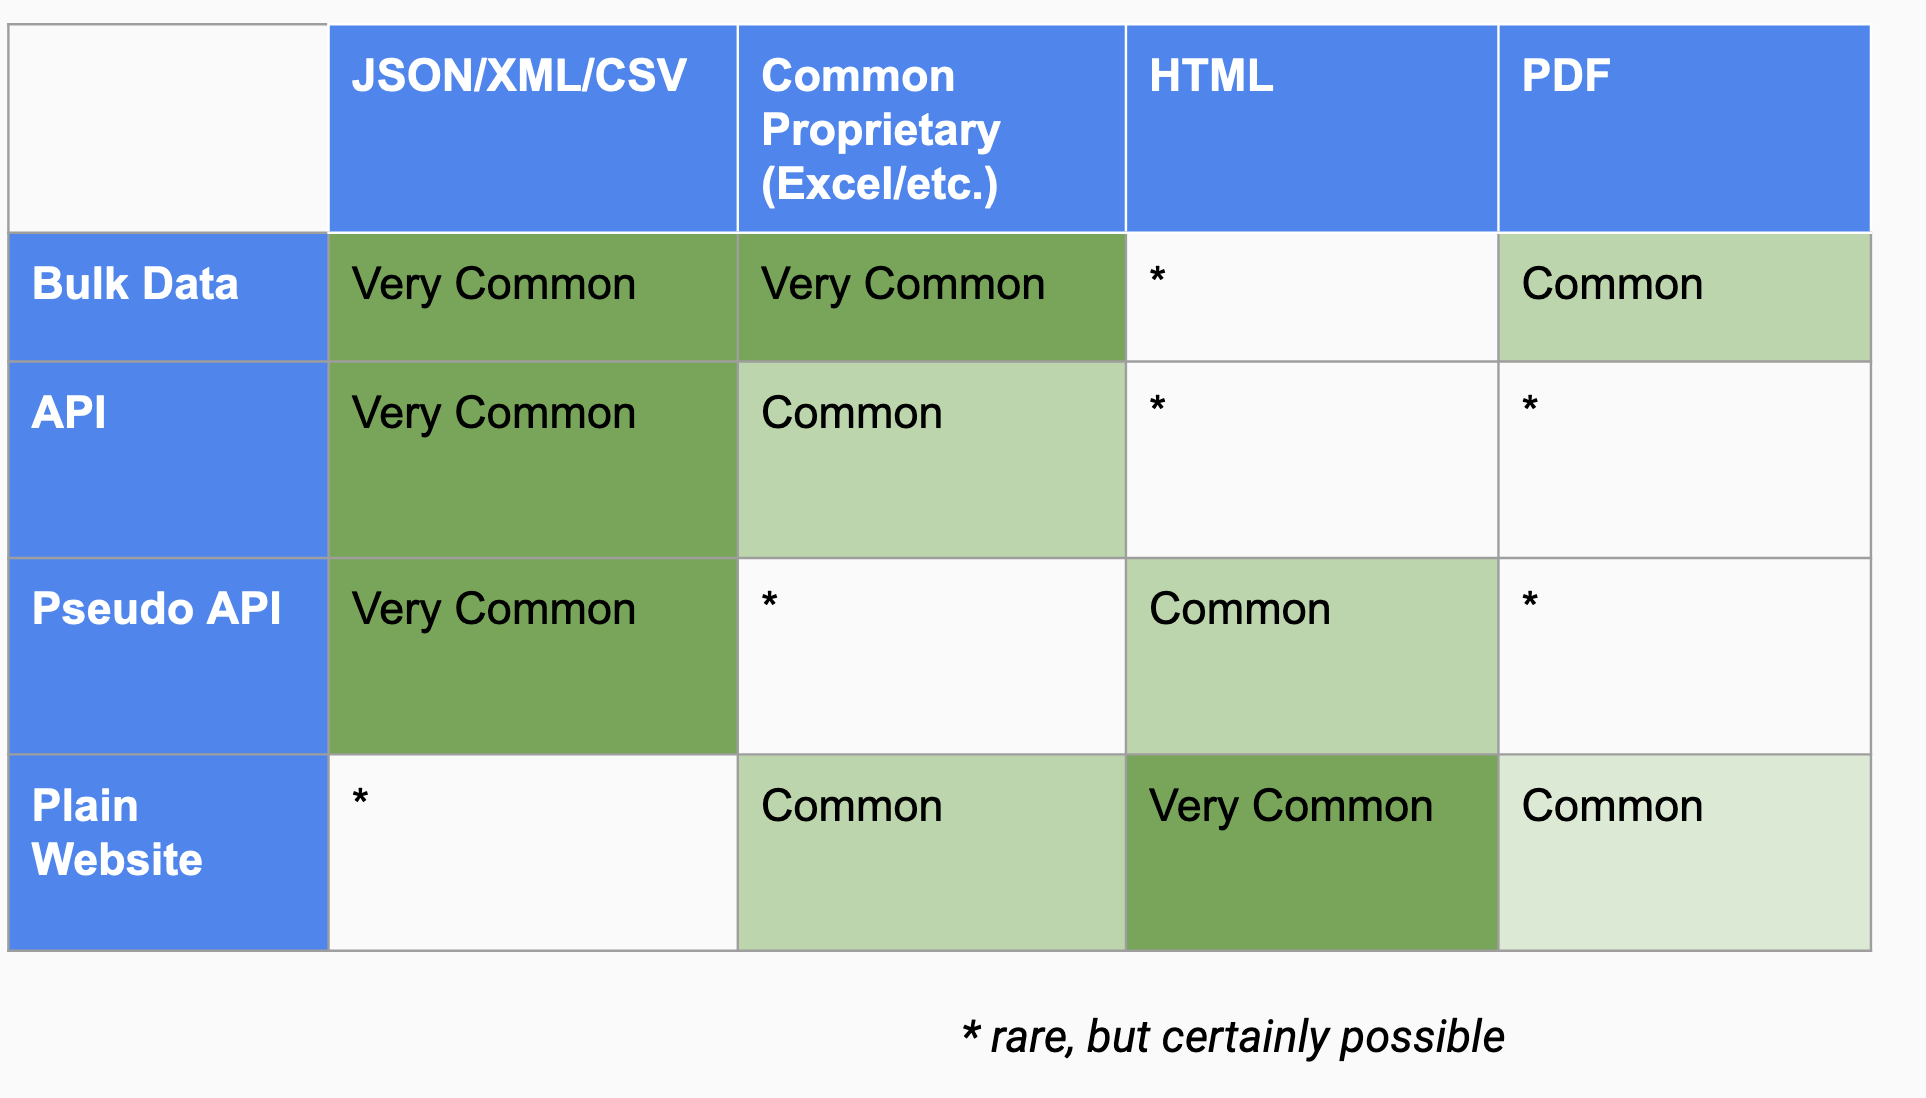

### Scraping Best Practices

**If HTML changes, the scraper will likely break.  That’s OK.**

Goal is to not break unless the part of the page we’re concerned with changes.
* Tip #1: Avoid depending (unnecessarily) on ordering of tags.
* Tip #2: Try to just use selectors from the immediate path.
* Tip #3: Comment assumptions liberally!

You can’t plan for every scenario, often better to take a fail-fast approach.
* Tip #4: Check expected number of columns (or similar).
* Tip #5: Add soundness checks for data w/ known constraints. (e.g. years, phone numbers)

### Scraping: Common Challenges

* Malformed HTML
    - Pre-process HTML before handing to lxml/BeautifulSoup
* Bare HTML/Missing Sections 
    - Likely JS behind the scenes
* requests & browser receiving different HTML
    * User Agent
    * JS Cookies
* Anti-bot CDNs like CloudFlare


### Other Scraping Libraries

* `scrapy`: most commonly used full scraping framework (large but powerful)
* `scrapelib`: wrapper for requests that handles flaky pages & retries
* `selenium`/`playwright`: allows scripting browser directly, for pages with heavy JS
* `feedparser`: RSS feeds can often serve as a sort of psuedo-API
